In [15]:
using LinearAlgebra
using Plots

In [16]:
#= Physic constant define :
    - ħ stands for reduced Planck constant
    - k stands for force constant
    - m stands for mass of the particle
=#

ħ = 1
k = 1
ω = sqrt(k/m)

#= Consts define :
    - n   number of division
    - x⁻  left boundary of position
    - x⁺  right boundary of position
    - Δx  step size of position  
=#
n = 300
x⁺ = 5
x⁻ = -5
Δx = (x⁺-x⁻)/n

#===================================================
Mathematic model pre-defines for harmonic oscillator
===================================================#

#= Potential energy ∨(x)
    - x : position input, support vector input 
    
    Return the potential energy based on harmonic oscillator
    
    Example:
    for input x it gives return ∨(x)
    for vector x⃗ it gives return [∨(x₁),∨(x₂),...,∨(xₙ)]
=#
function ∨(x)
    return 1/2*k*x.^2
end

#= Position-dependent mass m(x)
    - x : position input, support vector input 
    
    Return the mass at specific position
    
    Example:
    for input x it gives return m(x)
    for vector x⃗ it gives return [m(x₁),m(x₂),...,m(xₙ)]
=#

function M(x)
    return exp(-x.^2)
end

#===========================================
 Pre-defines for solveing numercial solution
============================================#

#= Position vector x⃗
    Physical definiton:
    - x⃗ = [x₁,x₂,...,xₙ] 
=#
x⃗ = Float64[x⁻+i*Δx for i in 0:n-1]

#= Spatial derivative matrix ∂/∂x
for a 5*5 spatial derivative matrix
             [ -1 1 . . .]
             [ . -1 1 . .]
    - ∂/∂x = [ . . -1 1 .] * 1/Δx
             [ . . . -1 1]
             [ . . . . -1]
=#
∂➗∂x = diagm(0=>-1*ones(n),1=>ones(n-1))/Δx

#= Momentum operator square p̂²
    for a 5*5 momentum operator square matrix
            [-2 1 . . .]
            [1 -2 1 . .]
    - p̂² =  [. 1 -2 1 .]   *  -ħ^2/(Δx^2)
            [. . 1 -2 1]
            [. . . 1 -2]
=#
p̂² = diagm(0=>-2*ones(n),1=>ones(n-1),-1=>ones(n-1))*-ħ/(Δx^2)

for i in 1:n
    p̂²[i, :] = p̂²[i, :] / M(x⃗[i])
end

#= Potential operator ∨̂
    for a 5*5 momentum operator square matrix
            [∨(x₁). . . . ]
            [. ∨(x₂). . . ]
    - ∨̂ =   [. . ∨(x₃). . ]
            [. . . ∨(x₄). ]
            [. . . . ∨(x₅)]
    
=#
∨̂ = diagm(0=>∨(x⃗))

#= Hamiltonian  operator Ĥ
    Hamiltonian operator will be the sum of kinetic energy & potential energy
    - Ĥ = p̂²/2m + ∨̂
=#
Ĥ = p̂²/2m + ∨̂


# Find Eigenvalues and eigenvectors for Ĥ
E,ψ = eigen(Ĥ)

# # normalize each eigenvector
# for i in 1:n
#     ψ[:,i] = ψ[:,i]/norm(ψ[:,i])
# end

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
300-element Vector{Float64}:
  0.3251027577250394
  2.1354925017966777
  5.375580264004566
 10.16754693500134
 16.52300292988552
 24.43719788147731
 33.90180363422294
 44.906671040235636
 57.44010665713535
 71.48890474421661
  ⋮
  1.3431412337599744e13
  1.4539559004592514e13
  2.0096552273119586e13
  2.2320644290656656e13
  3.0921869128224082e13
  3.582095494161879e13
  4.974443926016465e13
  6.27849488918114e13
  8.742786787410434e13
vectors:
300×300 Matrix{Float64}:
 -0.000620271  -0.000800549  -0.000903284  …  -2.56503e-31  -0.805204
 -0.00124054   -0.0016011    -0.00180657      -7.75543e-31   0.562199
 -0.00186081   -0.00240165   -0.00270985      -1.27346e-30  -0.185093
 -0.00248108   -0.0032022    -0.00361313      -6.08364e-30   0.036038
 -0.00310136   -0.00400274   -0.00451642      -8.1598e-30   -0.004521
 -0.00372163   -0.00480329   -0.0054197    …  -1.44849e-29   0.000381975
 -0.0043419    -0.00560384   -0.00632

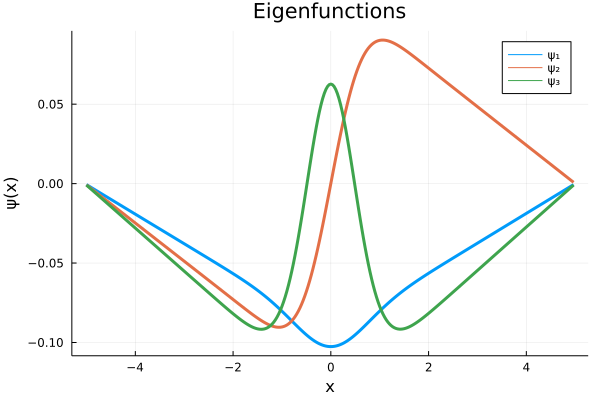

In [19]:
# plot the eigenvectors

plot(x⃗,ψ[:,1:3],label=["ψ₁" "ψ₂" "ψ₃"],title="Eigenfunctions",xlabel="x",ylabel="ψ(x)",lw=3,)
